## 1. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt

INPUT_CSV = '/home/sramkova/diploma_thesis_data/neighbourhood_both_days.csv'

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0     10.2.4.44  0x10e  C91B543mPc9uqyAmZg                    SF   
1     10.2.4.44  0x37a  CJDeQn1RA4RpXDJi76                    SF   
2     10.2.4.44  0x3c0   CPm0gG6Cmt4bLshDh                    SF   
3     10.2.4.44  0x7db   CFPUgMgxMkSXwpF0l                    S1   
4     10.2.4.44  0x80c  C93t9a4VGVuS6lYHD8                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.523709                    603                      1727   
1             0.010425                    116                       384   
2             0.012546                    116                       384   
3             0.014672                    114                       277   
4             0.009000                    116                       384   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              52240                    21              tcp  ...   
1              51558                     5              tcp  ...   
2              51822                     5              tcp  ...   
3              52580                     3              tcp  ...   
4              52498                     5              tcp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  attack_label  
0              No        Normal  
1              No        Normal  
2              No        Normal  
3              No        Normal  
4              No        Normal  

[5 rows x 219 columns]

In [2]:
# for col in raw_data.columns:
#     print(col)

In [3]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0          10.2.4.44     0x10e  C91B543mPc9uqyAmZg                    SF   
1          10.2.4.44     0x37a  CJDeQn1RA4RpXDJi76                    SF   
2          10.2.4.44     0x3c0   CPm0gG6Cmt4bLshDh                    SF   
3          10.2.4.44     0x7db   CFPUgMgxMkSXwpF0l                    S1   
4          10.2.4.44     0x80c  C93t9a4VGVuS6lYHD8                    SF   
...              ...       ...                 ...                   ...   
472340     10.1.4.48  0x2f91e1  CNdEBk2wkWMyECmMhg                    SF   
472341     10.1.4.48  0x2f9237  C1vvK01SBXeDpOVbK2                    SF   
472342     10.1.4.48  0x2f928f  Clekl93UX9CjnaZy43                    SF   
472343     10.1.4.48  0x2f9644   CeZpVHXDH6ULU5U9a                    S0   
472344     10.1.4.48  0x2f9687    CHSEg28d6gazKUU4                    SF   

        connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                  0.523709                    603                      1727   
1                  0.010425                    116                       384   
2                  0.012546                    116                       384   
3                  0.014672                    114                       277   
4                  0.009000                    116                       384   
...                     ...                    ...                       ...   
472340            15.786600                     48                        76   
472341             0.003983                     48                        76   
472342             0.004308                     48                        76   
472343             0.000000                      0                        76   
472344             0.006392                     48                        76   

        connection.orig_p  connection.orig_pkts connection.proto  \
0                   52240                    21              tcp   
1                   51558                     5              tcp   
2                   51822                     5              tcp   
3                   52580                     3              tcp   
4                   52498                     5              tcp   
...                   ...                   ...              ...   
472340                123                     1              udp   
472341                123                     1              udp   
472342                123                     1              udp   
472343                123                     1              udp   
472344                123                     1              udp   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                       32091                     34507                443   
1                         531                       851                 80   
2                         531                       799                 80   
3                         523                       164                 80   
4                         531                       799                 80   
...                       ...                       ...                ...   
472340                     96                       152                123   
472341                     48                        76                123   
472342                     48                        76                123   
472343                      0                         0                123   
472344                     48                        76                123   

        connection.resp_pkts connection.service                connection.ts  \
0                         20                ssl  2019-03-19T10:10:49.194278Z   
1                          6               http  2019-03-19T10:58:49.150898Z   
2                          5               http  2019-03-19T11:23:34.113264Z   
3                          3               http  2019-03-19

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1. Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [4]:
# clean garbage (null, NaN, ..)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
                                                ..
resp_resp_similar_ssl_validation_status_count    0
resp_resp_similar_files_source_count             0
resp_resp_similar_file_md5_count                 0
attacker_label                                   0
attack_label                                     0
Length: 219, dtype: int64

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
1246      4.122.55.7   0x1af2d  C5X50R3Bpp133FmUfd                   OTH   
1247      4.122.55.7   0x1aff5  CA5FNA3lboUOr3QzTl                    SF   
1248      4.122.55.7   0x1b08b  Co8mPy3Ha1g0EmzGfi                   OTH   
1249      4.122.55.7   0x1b140  CijLuB2h0np8Rpr8Dj                   OTH   
1250      4.122.55.7   0x32edd  CJTu721a6u6DkmJ382                   OTH   
...              ...       ...                 ...                   ...   
472070    5.1.56.123  0x23584b  CPyS3i3aSCZDWHXXh3                    S0   
472071    5.1.56.123  0x266be1  CyMuxg4UTjaYwmZoG9                    S0   
472072    5.1.56.123  0x2affea   CKRIKxiF3kx6RnUle                    S0   
472073    5.1.56.123  0x2c8a72  CkMwwP2foTGYNMDfwb                    S0   
472074    5.1.56.123  0x2f95a7  CFzZyi4MosGHxfcmmg                    S0   

        connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
1246               0.000000                      0                        84   
1247            3947.217863                 431180                    538439   
1248               0.000000                      0                        84   
1249           13815.456036                1591503                   1973850   
1250               0.000000                      0                        84   
...                     ...                    ...                       ...   
472070             0.000000                      0                        76   
472071             0.000000                      0                        76   
472072             0.000000                      0                        76   
472073             0.000000                      0                        76   
472074             0.000000                      0                        76   

        connection.orig_p  connection.orig_pkts connection.proto  \
1246                    0                     1             icmp   
1247                 9001                  2302              tcp   
1248                    0                     1             icmp   
1249                 9003                  8446              tcp   
1250                    0                     1             icmp   
...                   ...                   ...              ...   
472070                123                     1              udp   
472071                123                     1              udp   
472072                123                     1              udp   
472073                123                     1              udp   
472074                123                     1              udp   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
1246                        0                         0                  8   
1247                   329840                    562820              45462   
1248                        0                         0                  8   
1249                  1216627                   2051187              36136   
1250                        0                         0                  8   
...                       ...                       ...                ...   
472070                      0                         0                123   
472071                      0                         0                123   
472072                      0                         0                123   
472073                      0                         0                123   
472074                      0                         0                123   

        connection.resp_pkts connection.service                connection.ts  \
1246                       0               none  2019-03-19T13:09:29.075529Z   
1247                    4626               none  2019-03-19T13:12:42.574312Z   
1248                       0               none  2019-03-19T14:37:11.094098Z   
1249                   16819               none  2019-03-19

In [6]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [7]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [8]:
data = raw_data.copy()

### 2. Time

In [10]:
data['orig_resp_connection.time_mean'].describe()

count                                  472345
unique                                 314053
top       2019-03-20 08:02:19.425431552+00:00
freq                                    11760
Name: orig_resp_connection.time_mean, dtype: object

In [12]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

# (OR: convert 'connections.ts' to 'date', 'time' columns) ?? TODO

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0     10.2.4.44  0x10e  C91B543mPc9uqyAmZg                    SF   
1     10.2.4.44  0x37a  CJDeQn1RA4RpXDJi76                    SF   
2     10.2.4.44  0x3c0   CPm0gG6Cmt4bLshDh                    SF   
3     10.2.4.44  0x7db   CFPUgMgxMkSXwpF0l                    S1   
4     10.2.4.44  0x80c  C93t9a4VGVuS6lYHD8                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.523709                    603                      1727   
1             0.010425                    116                       384   
2             0.012546                    116                       384   
3             0.014672                    114                       277   
4             0.009000                    116                       384   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              52240                    21              tcp   
1              51558                     5              tcp   
2              51822                     5              tcp   
3              52580                     3              tcp   
4              52498                     5              tcp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                  32091                     34507                443   
1                    531                       851                 80   
2                    531                       799                 80   
3                    523                       164                 80   
4                    531                       799                 80   

   connection.resp_pkts connection.service                connection.ts  \
0                    20                ssl  2019-03-19T10:10:49.194278Z   
1                     6               http  2019-03-19T10:58:49.150898Z   
2                     5               http  2019-03-19T11:23:34.113264Z   
3                     3               http  2019-03-19T12:35:34.077791Z   
4                     5               http  2019-03-19T12:28:49.134506Z   

  responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0   4.122.55.2          0          0           0          1            1   
1   4.122.55.2          0          0           1          0            1   
2   4.122.55.2          0          0           1          0            1   
3   4.122.55.2          0          0           1          0            0   
4   4.122.55.2          0          0           1          0            1   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []     ['GET']   
2        []        []                []           []     ['GET']   
3        []        []                []           []     ['GET']   
4        []        []                []           []     ['GET']   

  http_status_code http_user_agent ssl_version  \
0               []              []  ['TLSv12']   
1            [301]          [None]          []   
2            [301]          [None]          []   
3              [0]          [None]          []   
4            [301]          [None]          []   

                                  ssl_cipher ssl_curve ssl_validation_status  \
0  ['TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384']    [None]                [None]   
1                                         []        []                    []   
2                                         []        []                    []   
3                                         []        []                    []   
4                                         []        []                    []   

  files_source                              file_md5 dns_dicts ssh_dicts  \
0      ['SSL']  ['1ded0213d77efa85abc3593e21593bea']        []        []   
1     ['HTTP']  ['b78b1c61f692fd8175bf471406c5469b']        []        [] 

In [14]:
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_rows')

In [15]:
# check that something actually got updated
distinct_counter = data.apply(lambda x: len(x.unique()))
distinct_counter

originated_ip                                       275
uid                                              420601
connection.uid                                   472345
connection.conn_state                                13
connection.duration                              187754
connection.orig_bytes                              7401
connection.orig_ip_bytes                          12720
connection.orig_p                                 49492
connection.orig_pkts                               1397
connection.proto                                      3
connection.resp_bytes                             12907
connection.resp_ip_bytes                          24985
connection.resp_p                                  1326
connection.resp_pkts                               1245
connection.service                                   14
connection.ts                                    472345
responded_ip                                       2678
dns_count                                       

In [16]:
pd.reset_option('display.max_rows')

#### Frequency percentage of labels:

In [17]:
count_classes = pd.value_counts(data['attacker_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[count_classes['Yes']/len(data), count_classes['No']/len(data)]})

In [18]:
percentage_df

Class  Frequency Percentage
0   Yes              0.562676
1    No              0.437324

<AxesSubplot:xlabel='Class'>

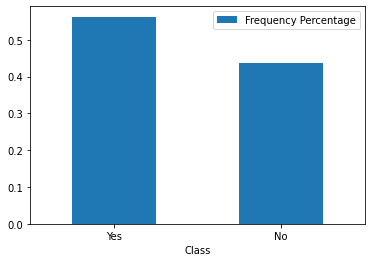

In [19]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

There is a *pretty big imbalance* (8:2).

(https://machinelearningmastery.com/what-is-imbalanced-classification/)

**Imbalanced classification problem**: where  distribution of examples across known classes is biased/ skewed 

Sligt bias - severe imbalance (one example in minority class for 100+, 1.000+, or 1.000.000+ of examples in majority class(es)).

-  predictive modeling (as most ML algors) used for classification were designed around the assumption of an equal number of examples for each class => challenge
- result:  poor predictive performance for the minority class

"**A slight imbalance is often not a concern,** and the problem **can** often **be treated like a normal classification** predictive modeling **problem.** A severe imbalance of the classes can be challenging to model and may require the use of specialized techniques."


In [20]:
count_attack_classes = pd.value_counts(data['attack_label'])
percentage_df = pd.DataFrame({'Class':['Attack', 'Other'], 'Frequency Attack Percentage':[(len(data) - count_attack_classes['Normal'] - count_attack_classes['Not_Specified'])/len(data), 
                                                                                          (count_attack_classes['Normal'] + count_attack_classes['Not_Specified'])/len(data)]})
percentage_df

Class  Frequency Attack Percentage
0  Attack                     0.408134
1   Other                     0.591866

<AxesSubplot:xlabel='Class'>

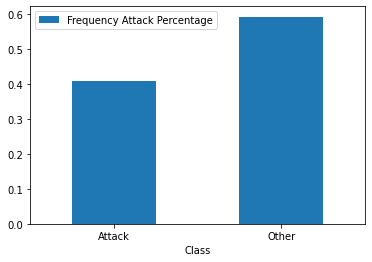

In [21]:
percentage_df.plot.bar(x='Class', y='Frequency Attack Percentage', rot=0)

# 4. Feature selection

In [22]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'attack_label', 'connection.ts']

In [23]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid originated_ip responded_ip  connection.time  \
0  C91B543mPc9uqyAmZg     10.2.4.44   4.122.55.2     1.552990e+09   
1  CJDeQn1RA4RpXDJi76     10.2.4.44   4.122.55.2     1.552993e+09   
2   CPm0gG6Cmt4bLshDh     10.2.4.44   4.122.55.2     1.552995e+09   
3   CFPUgMgxMkSXwpF0l     10.2.4.44   4.122.55.2     1.552999e+09   
4  C93t9a4VGVuS6lYHD8     10.2.4.44   4.122.55.2     1.552999e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.523709              52240                    603   
1             0.010425              51558                    116   
2             0.012546              51822                    116   
3             0.014672              52580                    114   
4             0.009000              52498                    116   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1727                    21                443   
1                       384                     5                 80   
2                       384                     5                 80   
3                       277                     3                 80   
4                       384                     5                 80   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  32091                     34507                    20   
1                    531                       851                     6   
2                    531                       799                     5   
3                    523                       164                     3   
4                    531                       799                     5   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp               http                    SF          0   
2              tcp               http                    SF          0   
3              tcp               http                    S1          0   
4              tcp               http                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            1               26   
1          0           1          0            1               29   
2          0           1          0            1               26   
3          0           1          0            0               25   
4          0           1          0            1               27   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.552990e+09                            0.170888   
1                    1.552993e+09                            0.148223   
2                    1.552995e+09                            0.342311   
3                    1.552999e+09                            0.174436   
4                    1.552999e+09                            0.161780   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                             8.730769                            226.230769   
1                             8.000000                            206.137931   
2                             9.115385                            226.269231   
3                             8.960000                            231.520000   
4                             8.444444                            219.629630   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          20550.961538                             8.500000   
1                          18428.310345                             7.310345   
2                          20551.000000                             8.384615   
3                          21369.200000                             8.360000   
4                          19791.592593                             8.074074   

  orig_orig_connection.protocol_

### 4.1 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be way to big + the information about "closer" IP addresses gets lost)
2. somehow convert to a number so that the closeness is preserved 

In [24]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [25]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 4.2 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

Again, one-hot encoding would be useless (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [26]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [27]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid originated_ip responded_ip  connection.time  \
0  C91B543mPc9uqyAmZg     10.2.4.44   4.122.55.2     1.552990e+09   
1  CJDeQn1RA4RpXDJi76     10.2.4.44   4.122.55.2     1.552993e+09   
2   CPm0gG6Cmt4bLshDh     10.2.4.44   4.122.55.2     1.552995e+09   
3   CFPUgMgxMkSXwpF0l     10.2.4.44   4.122.55.2     1.552999e+09   
4  C93t9a4VGVuS6lYHD8     10.2.4.44   4.122.55.2     1.552999e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.523709              52240                    603   
1             0.010425              51558                    116   
2             0.012546              51822                    116   
3             0.014672              52580                    114   
4             0.009000              52498                    116   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1727                    21                443   
1                       384                     5                 80   
2                       384                     5                 80   
3                       277                     3                 80   
4                       384                     5                 80   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  32091                     34507                    20   
1                    531                       851                     6   
2                    531                       799                     5   
3                    523                       164                     3   
4                    531                       799                     5   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp               http                    SF          0   
2              tcp               http                    SF          0   
3              tcp               http                    S1          0   
4              tcp               http                    SF          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            1               26   
1          0           1          0            1               29   
2          0           1          0            1               26   
3          0           1          0            0               25   
4          0           1          0            1               27   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.552990e+09                            0.170888   
1                    1.552993e+09                            0.148223   
2                    1.552995e+09                            0.342311   
3                    1.552999e+09                            0.174436   
4                    1.552999e+09                            0.161780   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                             8.730769                            226.230769   
1                             8.000000                            206.137931   
2                             9.115385                            226.269231   
3                             8.960000                            231.520000   
4                             8.444444                            219.629630   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          20550.961538                             8.500000   
1                          18428.310345                             7.310345   
2                          20551.000000                             8.384615   
3                          21369.200000                             8.360000   
4                          19791.592593                             8.074074   

  orig_orig_connection.protocol_

In [28]:
# selected_df.to_csv('/home/sramkova/diploma_thesis_data/backup001.csv', index=False, header=True)

### 4.3 One-Hot encode categorical features for PCA visualization:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 4.3.1 Ports:

In [30]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
ohe_orig_p_df
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_3389', 'resp_p_cat_resp_443', 'resp_p_cat_resp_53',
       'resp_p_cat_resp_80', 'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid originated_ip     responded_ip  connection.time  \
0       C91B543mPc9uqyAmZg     10.2.4.44       4.122.55.2     1.552990e+09   
1       CJDeQn1RA4RpXDJi76     10.2.4.44       4.122.55.2     1.552993e+09   
2        CPm0gG6Cmt4bLshDh     10.2.4.44       4.122.55.2     1.552995e+09   
3        CFPUgMgxMkSXwpF0l     10.2.4.44       4.122.55.2     1.552999e+09   
4       C93t9a4VGVuS6lYHD8     10.2.4.44       4.122.55.2     1.552999e+09   
...                    ...           ...              ...              ...   
472340  CNdEBk2wkWMyECmMhg     10.1.4.48     81.0.208.219     1.553070e+09   
472341  C1vvK01SBXeDpOVbK2     10.1.4.48   147.251.48.140     1.553072e+09   
472342  Clekl93UX9CjnaZy43     10.1.4.48  195.113.144.201     1.553075e+09   
472343   CeZpVHXDH6ULU5U9a     10.1.4.48   147.251.48.140     1.553081e+09   
472344    CHSEg28d6gazKUU4     10.1.4.48  195.113.144.201     1.553081e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.523709              52240                    603   
1                  0.010425              51558                    116   
2                  0.012546              51822                    116   
3                  0.014672              52580                    114   
4                  0.009000              52498                    116   
...                     ...                ...                    ...   
472340            15.786600                123                     48   
472341             0.003983                123                     48   
472342             0.004308                123                     48   
472343             0.000000                123                      0   
472344             0.006392                123                     48   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1727                    21                443   
1                            384                     5                 80   
2                            384                     5                 80   
3                            277                     3                 80   
4                            384                     5                 80   
...                          ...                   ...                ...   
472340                        76                     1                123   
472341                        76                     1                123   
472342                        76                     1                123   
472343                        76                     1                123   
472344                        76                     1                123   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       32091                     34507                    20   
1                         531                       851                     6   
2                         531                       799                     5   
3                         523                       164                     3   
4                         531                       799                     5   
...                       ...                       ...                   ...   
472340                     96                       152                     2   
472341                     48                        76                     1   
472342                     48                        76                     1   
472343                      0                         0                     0   
472344                     48                        76                     1   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp               http                    SF          0   
2                   tcp               http                    S

In [31]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_3389', 
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 4.3.2 Protocols:

In [32]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))
selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')


connection.uid originated_ip     responded_ip  connection.time  \
0       C91B543mPc9uqyAmZg     10.2.4.44       4.122.55.2     1.552990e+09   
1       CJDeQn1RA4RpXDJi76     10.2.4.44       4.122.55.2     1.552993e+09   
2        CPm0gG6Cmt4bLshDh     10.2.4.44       4.122.55.2     1.552995e+09   
3        CFPUgMgxMkSXwpF0l     10.2.4.44       4.122.55.2     1.552999e+09   
4       C93t9a4VGVuS6lYHD8     10.2.4.44       4.122.55.2     1.552999e+09   
...                    ...           ...              ...              ...   
472340  CNdEBk2wkWMyECmMhg     10.1.4.48     81.0.208.219     1.553070e+09   
472341  C1vvK01SBXeDpOVbK2     10.1.4.48   147.251.48.140     1.553072e+09   
472342  Clekl93UX9CjnaZy43     10.1.4.48  195.113.144.201     1.553075e+09   
472343   CeZpVHXDH6ULU5U9a     10.1.4.48   147.251.48.140     1.553081e+09   
472344    CHSEg28d6gazKUU4     10.1.4.48  195.113.144.201     1.553081e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.523709              52240                    603   
1                  0.010425              51558                    116   
2                  0.012546              51822                    116   
3                  0.014672              52580                    114   
4                  0.009000              52498                    116   
...                     ...                ...                    ...   
472340            15.786600                123                     48   
472341             0.003983                123                     48   
472342             0.004308                123                     48   
472343             0.000000                123                      0   
472344             0.006392                123                     48   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1727                    21                443   
1                            384                     5                 80   
2                            384                     5                 80   
3                            277                     3                 80   
4                            384                     5                 80   
...                          ...                   ...                ...   
472340                        76                     1                123   
472341                        76                     1                123   
472342                        76                     1                123   
472343                        76                     1                123   
472344                        76                     1                123   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       32091                     34507                    20   
1                         531                       851                     6   
2                         531                       799                     5   
3                         523                       164                     3   
4                         531                       799                     5   
...                       ...                       ...                   ...   
472340                     96                       152                     2   
472341                     48                        76                     1   
472342                     48                        76                     1   
472343                      0                         0                     0   
472344                     48                        76                     1   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp               http                    SF          0   
2                   tcp               http                    S

In [33]:
OHE_PROTO_CAT_COLS = ['connection.proto_icmp', 
                      'connection.proto_tcp',
                      'connection.proto_udp']

#### 4.3.3. Services:

In [34]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))
selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dhcp',
       'connection.service_dns', 'connection.service_http',
       'connection.service_imap', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntp',
       'connection.service_pop3', 'connection.service_smtp',
       'connection.service_socks', 'connection.service_ssh',
       'connection.service_ssl', 'connection.service_ssl,imap'],
      dtype='object')


connection.uid originated_ip     responded_ip  connection.time  \
0       C91B543mPc9uqyAmZg     10.2.4.44       4.122.55.2     1.552990e+09   
1       CJDeQn1RA4RpXDJi76     10.2.4.44       4.122.55.2     1.552993e+09   
2        CPm0gG6Cmt4bLshDh     10.2.4.44       4.122.55.2     1.552995e+09   
3        CFPUgMgxMkSXwpF0l     10.2.4.44       4.122.55.2     1.552999e+09   
4       C93t9a4VGVuS6lYHD8     10.2.4.44       4.122.55.2     1.552999e+09   
...                    ...           ...              ...              ...   
472340  CNdEBk2wkWMyECmMhg     10.1.4.48     81.0.208.219     1.553070e+09   
472341  C1vvK01SBXeDpOVbK2     10.1.4.48   147.251.48.140     1.553072e+09   
472342  Clekl93UX9CjnaZy43     10.1.4.48  195.113.144.201     1.553075e+09   
472343   CeZpVHXDH6ULU5U9a     10.1.4.48   147.251.48.140     1.553081e+09   
472344    CHSEg28d6gazKUU4     10.1.4.48  195.113.144.201     1.553081e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.523709              52240                    603   
1                  0.010425              51558                    116   
2                  0.012546              51822                    116   
3                  0.014672              52580                    114   
4                  0.009000              52498                    116   
...                     ...                ...                    ...   
472340            15.786600                123                     48   
472341             0.003983                123                     48   
472342             0.004308                123                     48   
472343             0.000000                123                      0   
472344             0.006392                123                     48   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1727                    21                443   
1                            384                     5                 80   
2                            384                     5                 80   
3                            277                     3                 80   
4                            384                     5                 80   
...                          ...                   ...                ...   
472340                        76                     1                123   
472341                        76                     1                123   
472342                        76                     1                123   
472343                        76                     1                123   
472344                        76                     1                123   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       32091                     34507                    20   
1                         531                       851                     6   
2                         531                       799                     5   
3                         523                       164                     3   
4                         531                       799                     5   
...                       ...                       ...                   ...   
472340                     96                       152                     2   
472341                     48                        76                     1   
472342                     48                        76                     1   
472343                      0                         0                     0   
472344                     48                        76                     1   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp               http                    SF          0   
2                   tcp               http                    S

In [35]:
OHE_SERVICE_CAT_COLS = ['connection.service_dce_rpc', 
                        'connection.service_dhcp',
                        'connection.service_dns', 
                        'connection.service_http',
                        'connection.service_imap', 
                        'connection.service_krb_tcp',
                        'connection.service_none', 
                        'connection.service_ntp',
                        'connection.service_pop3', 
                        'connection.service_smtp',
                        'connection.service_socks', 
                        'connection.service_ssh',
                        'connection.service_ssl', 
                        'connection.service_ssl,imap']

#### 4.3.4. Connection states:

In [36]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))
selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTOS0',
       'connection.conn_state_RSTR', 'connection.conn_state_RSTRH',
       'connection.conn_state_S0', 'connection.conn_state_S1',
       'connection.conn_state_S2', 'connection.conn_state_S3',
       'connection.conn_state_SF', 'connection.conn_state_SH',
       'connection.conn_state_SHR'],
      dtype='object')


connection.uid originated_ip     responded_ip  connection.time  \
0       C91B543mPc9uqyAmZg     10.2.4.44       4.122.55.2     1.552990e+09   
1       CJDeQn1RA4RpXDJi76     10.2.4.44       4.122.55.2     1.552993e+09   
2        CPm0gG6Cmt4bLshDh     10.2.4.44       4.122.55.2     1.552995e+09   
3        CFPUgMgxMkSXwpF0l     10.2.4.44       4.122.55.2     1.552999e+09   
4       C93t9a4VGVuS6lYHD8     10.2.4.44       4.122.55.2     1.552999e+09   
...                    ...           ...              ...              ...   
472340  CNdEBk2wkWMyECmMhg     10.1.4.48     81.0.208.219     1.553070e+09   
472341  C1vvK01SBXeDpOVbK2     10.1.4.48   147.251.48.140     1.553072e+09   
472342  Clekl93UX9CjnaZy43     10.1.4.48  195.113.144.201     1.553075e+09   
472343   CeZpVHXDH6ULU5U9a     10.1.4.48   147.251.48.140     1.553081e+09   
472344    CHSEg28d6gazKUU4     10.1.4.48  195.113.144.201     1.553081e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.523709              52240                    603   
1                  0.010425              51558                    116   
2                  0.012546              51822                    116   
3                  0.014672              52580                    114   
4                  0.009000              52498                    116   
...                     ...                ...                    ...   
472340            15.786600                123                     48   
472341             0.003983                123                     48   
472342             0.004308                123                     48   
472343             0.000000                123                      0   
472344             0.006392                123                     48   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1727                    21                443   
1                            384                     5                 80   
2                            384                     5                 80   
3                            277                     3                 80   
4                            384                     5                 80   
...                          ...                   ...                ...   
472340                        76                     1                123   
472341                        76                     1                123   
472342                        76                     1                123   
472343                        76                     1                123   
472344                        76                     1                123   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       32091                     34507                    20   
1                         531                       851                     6   
2                         531                       799                     5   
3                         523                       164                     3   
4                         531                       799                     5   
...                       ...                       ...                   ...   
472340                     96                       152                     2   
472341                     48                        76                     1   
472342                     48                        76                     1   
472343                      0                         0                     0   
472344                     48                        76                     1   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp               http                    SF          0   
2                   tcp               http                    S

In [37]:
OHE_CONN_STATE_CAT_COLS = ['connection.conn_state_OTH', 
                           'connection.conn_state_REJ',
                           'connection.conn_state_RSTO', 
                           'connection.conn_state_RSTOS0',
                           'connection.conn_state_RSTR', 
                           'connection.conn_state_RSTRH',
                           'connection.conn_state_S0', 
                           'connection.conn_state_S1',
                           'connection.conn_state_S2', 
                           'connection.conn_state_S3',
                           'connection.conn_state_SF', 
                           'connection.conn_state_SH',
                           'connection.conn_state_SHR']

#### 4.3.5. Neighbourhood categorical attributes:

In [38]:
neighbourhood_categorical_cols = ORIG_ORIG_CATEGORICAL_COLS + ORIG_RESP_CATEGORICAL_COLS + RESP_ORIG_CATEGORICAL_COLS + RESP_RESP_CATEGORICAL_COLS

for col in neighbourhood_categorical_cols:
    ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
    ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(selected_df[[col]]))
    selected_df = selected_df.join(ohe_col_vals_df)

selected_df

Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
Index(['orig_orig_connection.service_mode_dhcp',
       'orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_http',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_smtp',
       'orig_orig_connection.service_mode_ssh',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_REJ',
       'orig_orig_connection.conn_state_mode_RSTO',
       'orig_orig_connection.conn_state_mode_RSTR',
       'orig_orig_connection.conn_state_mode_RSTRH',
       'orig_orig_connection.conn_state_mode_S0',
       'orig_orig_connection.conn_state_mode_S1',
       'orig_orig_connection.conn_state_mode_S2',
       'o

connection.uid originated_ip     responded_ip  connection.time  \
0       C91B543mPc9uqyAmZg     10.2.4.44       4.122.55.2     1.552990e+09   
1       CJDeQn1RA4RpXDJi76     10.2.4.44       4.122.55.2     1.552993e+09   
2        CPm0gG6Cmt4bLshDh     10.2.4.44       4.122.55.2     1.552995e+09   
3        CFPUgMgxMkSXwpF0l     10.2.4.44       4.122.55.2     1.552999e+09   
4       C93t9a4VGVuS6lYHD8     10.2.4.44       4.122.55.2     1.552999e+09   
...                    ...           ...              ...              ...   
472340  CNdEBk2wkWMyECmMhg     10.1.4.48     81.0.208.219     1.553070e+09   
472341  C1vvK01SBXeDpOVbK2     10.1.4.48   147.251.48.140     1.553072e+09   
472342  Clekl93UX9CjnaZy43     10.1.4.48  195.113.144.201     1.553075e+09   
472343   CeZpVHXDH6ULU5U9a     10.1.4.48   147.251.48.140     1.553081e+09   
472344    CHSEg28d6gazKUU4     10.1.4.48  195.113.144.201     1.553081e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.523709              52240                    603   
1                  0.010425              51558                    116   
2                  0.012546              51822                    116   
3                  0.014672              52580                    114   
4                  0.009000              52498                    116   
...                     ...                ...                    ...   
472340            15.786600                123                     48   
472341             0.003983                123                     48   
472342             0.004308                123                     48   
472343             0.000000                123                      0   
472344             0.006392                123                     48   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1727                    21                443   
1                            384                     5                 80   
2                            384                     5                 80   
3                            277                     3                 80   
4                            384                     5                 80   
...                          ...                   ...                ...   
472340                        76                     1                123   
472341                        76                     1                123   
472342                        76                     1                123   
472343                        76                     1                123   
472344                        76                     1                123   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       32091                     34507                    20   
1                         531                       851                     6   
2                         531                       799                     5   
3                         523                       164                     3   
4                         531                       799                     5   
...                       ...                       ...                   ...   
472340                     96                       152                     2   
472341                     48                        76                     1   
472342                     48                        76                     1   
472343                      0                         0                     0   
472344                     48                        76                     1   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp               http                    SF          0   
2                   tcp               http                    S

In [39]:
ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp',
                          'orig_orig_connection.protocol_mode_tcp',
                          'orig_orig_connection.protocol_mode_udp',
                          
                          'orig_orig_connection.service_mode_dhcp',
                          'orig_orig_connection.service_mode_dns',
                          'orig_orig_connection.service_mode_http',
                          'orig_orig_connection.service_mode_none',
                          'orig_orig_connection.service_mode_ntp',
                          'orig_orig_connection.service_mode_smtp',
                          'orig_orig_connection.service_mode_ssh',
                          'orig_orig_connection.service_mode_ssl',
                          
                          'orig_orig_connection.conn_state_mode_OTH',
                          'orig_orig_connection.conn_state_mode_REJ',
                          'orig_orig_connection.conn_state_mode_RSTO',
                          'orig_orig_connection.conn_state_mode_RSTR',
                          'orig_orig_connection.conn_state_mode_RSTRH',
                          'orig_orig_connection.conn_state_mode_S0',
                          'orig_orig_connection.conn_state_mode_S1',
                          'orig_orig_connection.conn_state_mode_S2',
                          'orig_orig_connection.conn_state_mode_S3',
                          'orig_orig_connection.conn_state_mode_SF',
                          'orig_orig_connection.conn_state_mode_SH',
                          'orig_orig_connection.conn_state_mode_SHR']

ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-',
                          'orig_resp_connection.protocol_mode_icmp',
                          'orig_resp_connection.protocol_mode_tcp',
                          'orig_resp_connection.protocol_mode_udp',
                          
                          'orig_resp_connection.service_mode_-',
                          'orig_resp_connection.service_mode_dhcp',
                          'orig_resp_connection.service_mode_dns',
                          'orig_resp_connection.service_mode_http',
                          'orig_resp_connection.service_mode_none',
                          'orig_resp_connection.service_mode_ntp',
                          'orig_resp_connection.service_mode_socks',
                          'orig_resp_connection.service_mode_ssh',
                          'orig_resp_connection.service_mode_ssl',
                          'orig_resp_connection.conn_state_mode_-',
                          
                          'orig_resp_connection.conn_state_mode_OTH',
                          'orig_resp_connection.conn_state_mode_REJ',
                          'orig_resp_connection.conn_state_mode_RSTO',
                          'orig_resp_connection.conn_state_mode_RSTR',
                          'orig_resp_connection.conn_state_mode_S0',
                          'orig_resp_connection.conn_state_mode_S1',
                          'orig_resp_connection.conn_state_mode_S2',
                          'orig_resp_connection.conn_state_mode_S3',
                          'orig_resp_connection.conn_state_mode_SF',
                          'orig_resp_connection.conn_state_mode_SH',
                          'orig_resp_connection.conn_state_mode_SHR']

RESP_ORIG_OHE_CAT_COLS = ['resp_orig_connection.protocol_mode_-',
                          'resp_orig_connection.protocol_mode_icmp',
                          'resp_orig_connection.protocol_mode_tcp',
                          'resp_orig_connection.protocol_mode_udp',
                          
                          'resp_orig_connection.service_mode_-',
                          'resp_orig_connection.service_mode_dhcp',
                          'resp_orig_connection.service_mode_dns',
                          'resp_orig_connection.service_mode_http',
                          'resp_orig_connection.service_mode_none',
                          'resp_orig_connection.service_mode_ntp',
                          'resp_orig_connection.service_mode_smtp',
                          'resp_orig_connection.service_mode_ssl',
                          
                          'resp_orig_connection.conn_state_mode_-',
                          'resp_orig_connection.conn_state_mode_OTH',
                          'resp_orig_connection.conn_state_mode_REJ',
                          'resp_orig_connection.conn_state_mode_RSTO',
                          'resp_orig_connection.conn_state_mode_RSTR',
                          'resp_orig_connection.conn_state_mode_S0',
                          'resp_orig_connection.conn_state_mode_S1',
                          'resp_orig_connection.conn_state_mode_S2',
                          'resp_orig_connection.conn_state_mode_S3',
                          'resp_orig_connection.conn_state_mode_SF',
                          'resp_orig_connection.conn_state_mode_SH',
                          'resp_orig_connection.conn_state_mode_SHR']

RESP_RESP_OHE_CAT_COLS = ['resp_resp_connection.protocol_mode_icmp',
                          'resp_resp_connection.protocol_mode_tcp',
                          'resp_resp_connection.protocol_mode_udp',
                          
                          'resp_resp_connection.service_mode_dhcp',
                          'resp_resp_connection.service_mode_dns',
                          'resp_resp_connection.service_mode_http',
                          'resp_resp_connection.service_mode_none',
                          'resp_resp_connection.service_mode_ntp',
                          'resp_resp_connection.service_mode_socks',
                          'resp_resp_connection.service_mode_ssh',
                          'resp_resp_connection.service_mode_ssl',
                          
                          'resp_resp_connection.conn_state_mode_OTH',
                          'resp_resp_connection.conn_state_mode_REJ',
                          'resp_resp_connection.conn_state_mode_RSTO',
                          'resp_resp_connection.conn_state_mode_RSTR',
                          'resp_resp_connection.conn_state_mode_RSTRH',
                          'resp_resp_connection.conn_state_mode_S0',
                          'resp_resp_connection.conn_state_mode_S1',
                          'resp_resp_connection.conn_state_mode_S2',
                          'resp_resp_connection.conn_state_mode_S3',
                          'resp_resp_connection.conn_state_mode_SF',
                          'resp_resp_connection.conn_state_mode_SH',
                          'resp_resp_connection.conn_state_mode_SHR']

In [40]:
selected_df.to_csv('/home/sramkova/diploma_thesis_data/neighbourhood_both_days_14_10_2021_backup1.csv', index=False, header=True)

### 4.3 Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [41]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     4.723450e+05        472345.000000      472345.000000   
mean      1.553050e+09            12.989186       41580.853982   
std       3.347445e+04           169.497371       19028.068474   
min       1.552990e+09             0.000000           0.000000   
25%       1.553008e+09             0.000000       35165.000000   
50%       1.553066e+09             0.006710       48136.000000   
75%       1.553073e+09             0.308995       55619.000000   
max       1.553088e+09         26718.986511       65534.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           4.723450e+05              4.723450e+05         472345.000000   
mean            4.430956e+04              2.272216e+03             23.539294   
std             7.887787e+06              1.181989e+05            802.812056   
min             0.000000e+00              0.000000e+00              0.000000   
25%             0.000000e+00              4.400000e+01              1.000000   
50%             4.200000e+01              7.600000e+01              1.000000   
75%             1.950000e+02              5.260000e+02              6.000000   
max             1.981718e+09              4.545502e+07         176170.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count      472345.000000           4.723450e+05              4.723450e+05   
mean         2795.068213           5.257307e+04              4.141463e+04   
std          8330.279635           2.166400e+06              1.646461e+06   
min             0.000000           0.000000e+00              0.000000e+00   
25%            53.000000           0.000000e+00              0.000000e+00   
50%           443.000000           4.800000e+01              8.400000e+01   
75%          1080.000000           5.310000e+02              7.000000e+02   
max         65389.000000           3.102849e+08              2.506347e+08   

       connection.resp_pkts      dns_count      ssh_count     http_count  \
count         472345.000000  472345.000000  472345.000000  472345.000000   
mean              16.523109       0.192874       0.039530       0.064434   
std              496.531368       0.394555       0.194853       0.245524   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                1.000000       0.000000       0.000000       0.000000   
75%                4.000000       0.000000       0.000000       0.000000   
max           101731.000000       1.000000       1.000000       1.000000   

           ssl_count    files_count  orig_orig_total  \
count  472345.000000  472345.000000    472345.000000   
mean        0.191614       0.343061      3172.801766   
std         0.393571       0.911913      4185.878526   
min         0.000000       0.000000         1.000000   
25%         0.000000       0.000000        58.000000   
50%         0.000000       0.000000       303.000000   
75%         0.000000       0.000000      6577.000000   
max         1.000000     128.000000     14557.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    4.723450e+05                       472345.000000   
mean                     1.553053e+09                           12.950516   
std                      3.508847e+04                           88.817874   
min                      1.552990e+09                            0.000000   
25%                      1.553008e+09                            0.023759   
50%                      1.553069e+09                            0.339309   
75%                      1.553077e+09                            8.221400   
max                      1.553092e+09                        22233.094747   

       orig_orig_connection.orig_pkts_mean  \
count                        472345.000000   
mean                 

In [42]:
pd.reset_option('display.max_rows')

### Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<img src="https://latex.codecogs.com/svg.latex?\Large&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" />

In [43]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               -0.498876         -0.468984        -1.791923   
1               -0.498876         -0.468984        -1.705888   
2               -0.498876         -0.468984        -1.661527   
3               -0.498876         -0.468984        -1.532474   
4               -0.498876         -0.468984        -1.544571   
...                   ...               ...              ...   
472340          -0.498935          0.961407         0.579250   
472341          -0.498935          2.213335         0.641984   
472342          -0.498935          3.100484         0.726288   
472343          -0.498935          2.213335         0.923662   
472344          -0.498935          3.100484         0.914252   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                 -0.073544           0.560181              -0.005541   
1                 -0.076572           0.524339              -0.005603   
2                 -0.076560           0.538213              -0.005603   
3                 -0.076547           0.578049              -0.005603   
4                 -0.076581           0.573740              -0.005603   
...                     ...                ...                    ...   
472340             0.016504          -2.178776              -0.005611   
472341            -0.076610          -2.178776              -0.005611   
472342            -0.076608          -2.178776              -0.005611   
472343            -0.076634          -2.178776              -0.005617   
472344            -0.076596          -2.178776              -0.005611   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      -0.004613             -0.003163          -0.282352   
1                      -0.015975             -0.023093          -0.325928   
2                      -0.015975             -0.023093          -0.325928   
3                      -0.016880             -0.025584          -0.325928   
4                      -0.015975             -0.023093          -0.325928   
...                          ...                   ...                ...   
472340                 -0.018581             -0.028075          -0.320766   
472341                 -0.018581             -0.028075          -0.320766   
472342                 -0.018581             -0.028075          -0.320766   
472343                 -0.018581             -0.028075          -0.320766   
472344                 -0.018581             -0.028075          -0.320766   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   -0.009454                 -0.004195              0.007002   
1                   -0.024022                 -0.024637             -0.021193   
2                   -0.024022                 -0.024668             -0.023207   
3                   -0.024026                 -0.025054             -0.027235   
4                   -0.024022                 -0.024668             -0.023207   
...                       ...                       ...                   ...   
472340              -0.024223                 -0.025061             -0.029249   
472341              -0.024245                 -0.025108             -0.031263   
472342              -0.024245                 -0.025108             -0.031263   
472343              -0.024268                 -0.025154             -0.033277   
472344              -0.024245                 -0.025108             -0.031263   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0       -0.488839  -0.202873   -0.262434   2.053977     0.720398   
1       -0.488839  -0.202873    3.810485  -0.486860     0.720398   
2       -0.488839  -0.202873    3.810485  -0.486860     0.720398   
3       -0.488839  -0.202873    3.810485  -0.486860    -0.376199   
4       -0.488839  -0.202873    3.810485  -0.486860     0.720398   
...           ...        ...         ...        ...     

### Normalization: 

= rescale values to range [0,1]

<img src="https://latex.codecogs.com/svg.latex?\Large&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" />

In [44]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2             3         4             5    \
0       0.045685  0.013622  0.006576  1.960063e-05  0.797143  3.042815e-07   
1       0.045685  0.013622  0.035749  3.901720e-07  0.786737  5.853508e-08   
2       0.045685  0.013622  0.050791  4.695537e-07  0.790765  5.853508e-08   
3       0.045685  0.013622  0.094551  5.491226e-07  0.802332  5.752586e-08   
4       0.045685  0.013622  0.090449  3.368391e-07  0.801080  5.853508e-08   
...          ...       ...       ...           ...       ...           ...   
472340  0.045667  0.313727  0.810603  5.908383e-04  0.001877  2.422141e-08   
472341  0.045667  0.576390  0.831875  1.490700e-07  0.001877  2.422141e-08   
472342  0.045667  0.762520  0.860461  1.612337e-07  0.001877  2.422141e-08   
472343  0.045667  0.576390  0.927388  0.000000e+00  0.001877  0.000000e+00   
472344  0.045667  0.762520  0.924197  2.392306e-07  0.001877  2.422141e-08   

             6         7         8             9             10        11   \
0       0.000038  0.000119  0.006775  1.034243e-04  1.376785e-04  0.000197   
1       0.000008  0.000028  0.001223  1.711330e-06  3.395380e-06  0.000059   
2       0.000008  0.000028  0.001223  1.711330e-06  3.187907e-06  0.000049   
3       0.000006  0.000017  0.001223  1.685548e-06  6.543389e-07  0.000029   
4       0.000008  0.000028  0.001223  1.711330e-06  3.187907e-06  0.000049   
...          ...       ...       ...           ...           ...       ...   
472340  0.000002  0.000006  0.001881  3.093931e-07  6.064604e-07  0.000020   
472341  0.000002  0.000006  0.001881  1.546965e-07  3.032302e-07  0.000010   
472342  0.000002  0.000006  0.001881  1.546965e-07  3.032302e-07  0.000010   
472343  0.000002  0.000006  0.001881  0.000000e+00  0.000000e+00  0.000000   
472344  0.000002  0.000006  0.001881  1.546965e-07  3.032302e-07  0.000010   

        12   13   14   15        16        17        18            19   \
0       0.0  0.0  0.0  1.0  0.007812  0.001718  0.006515  7.686182e-06   
1       0.0  0.0  1.0  0.0  0.007812  0.001924  0.034673  6.666793e-06   
2       0.0  0.0  1.0  0.0  0.007812  0.001718  0.048725  1.539647e-05   
3       0.0  0.0  1.0  0.0  0.000000  0.001649  0.091314  7.845762e-06   
4       0.0  0.0  1.0  0.0  0.007812  0.001786  0.087478  7.276530e-06   
...     ...  ...  ...  ...       ...       ...       ...           ...   
472340  0.0  0.0  0.0  0.0  0.000000  0.000481  0.817721  8.893610e-05   
472341  0.0  0.0  0.0  0.0  0.000000  0.000344  0.838073  1.989377e-07   
472342  0.0  0.0  0.0  0.0  0.000000  0.000275  0.866616  1.748115e-07   
472343  0.0  0.0  0.0  0.0  0.000000  0.000481  0.930764  4.560206e-06   
472344  0.0  0.0  0.0  0.0  0.000000  0.000206  0.927674  1.203049e-07   

             20            21        22        23        24        25   26   \
0       0.000171  5.076923e-06  0.000469  0.000087  0.051643  0.001030  0.0   
1       0.000156  4.626013e-06  0.000420  0.000075  0.065728  0.001030  0.0   
2       0.000178  5.077787e-06  0.000469  0.000086  0.051643  0.001030  0.0   
3       0.000175  5.195621e-06  0.000487  0.000086  0.046948  0.001030  0.0   
4       0.000165  4.928785e-06  0.000451  0.000083  0.056338  0.001030  0.0   
...          ...           ...       ...       ...       ...       ...  ...   
472340  0.000020  8.527712e-07  0.000002  0.000012  0.018779  0.000275  0.0   
472341  0.000016  7.480449e-07  0.000001  0.000010  0.014085  0.000206  0.0   
472342  0.000020  8.078885e-07  0.000001  0.000010  0.009390  0.000206  0.0   
472343  0.000022  8.527712e-07  0.000001  0.000010  0.018779  0.000275  0.0   
472344  0.000015  5.834750e-07  0.000001  0.000010  0.004695  0.000206  0.0   

        27        28        29        30       31   32   33   34   35   \
0       0.0  0.000626  0.000772  0.067073  0.00108  0.0  0.0  0.0  0.0   
1       0.0  0.000626  0.000772  0.085366  0.00108  0.0  0.0  0.0  0.0   
2       0.0  0.000626  0.000772  0.067073  0.00108  0.0  0.0  0.0  0.0   
3    

In [45]:
normalized_data.columns = continuous_data.columns

In [46]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0                0.045685          0.013622         0.006576   
1                0.045685          0.013622         0.035749   
2                0.045685          0.013622         0.050791   
3                0.045685          0.013622         0.094551   
4                0.045685          0.013622         0.090449   
...                   ...               ...              ...   
472340           0.045667          0.313727         0.810603   
472341           0.045667          0.576390         0.831875   
472342           0.045667          0.762520         0.860461   
472343           0.045667          0.576390         0.927388   
472344           0.045667          0.762520         0.924197   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0              1.960063e-05           0.797143           3.042815e-07   
1              3.901720e-07           0.786737           5.853508e-08   
2              4.695537e-07           0.790765           5.853508e-08   
3              5.491226e-07           0.802332           5.752586e-08   
4              3.368391e-07           0.801080           5.853508e-08   
...                     ...                ...                    ...   
472340         5.908383e-04           0.001877           2.422141e-08   
472341         1.490700e-07           0.001877           2.422141e-08   
472342         1.612337e-07           0.001877           2.422141e-08   
472343         0.000000e+00           0.001877           0.000000e+00   
472344         2.392306e-07           0.001877           2.422141e-08   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.000038              0.000119           0.006775   
1                       0.000008              0.000028           0.001223   
2                       0.000008              0.000028           0.001223   
3                       0.000006              0.000017           0.001223   
4                       0.000008              0.000028           0.001223   
...                          ...                   ...                ...   
472340                  0.000002              0.000006           0.001881   
472341                  0.000002              0.000006           0.001881   
472342                  0.000002              0.000006           0.001881   
472343                  0.000002              0.000006           0.001881   
472344                  0.000002              0.000006           0.001881   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                1.034243e-04              1.376785e-04              0.000197   
1                1.711330e-06              3.395380e-06              0.000059   
2                1.711330e-06              3.187907e-06              0.000049   
3                1.685548e-06              6.543389e-07              0.000029   
4                1.711330e-06              3.187907e-06              0.000049   
...                       ...                       ...                   ...   
472340           3.093931e-07              6.064604e-07              0.000020   
472341           1.546965e-07              3.032302e-07              0.000010   
472342           1.546965e-07              3.032302e-07              0.000010   
472343           0.000000e+00              0.000000e+00              0.000000   
472344           1.546965e-07              3.032302e-07              0.000010   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0             0.0        0.0         0.0        1.0     0.007812   
1             0.0        0.0         1.0        0.0     0.007812   
2             0.0        0.0         1.0        0.0     0.007812   
3             0.0        0.0         1.0        0.0     0.000000   
4             0.0        0.0         1.0        0.0     0.007812   
...           ...        ...         ...        ...     

In [47]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                                1                           0   
1                                1                           0   
2                                1                           0   
3                                1                           0   
4                                1                           0   
...                            ...                         ...   
472340                           0                           1   
472341                           0                           1   
472342                           0                           1   
472343                           0                           1   
472344                           0                           1   

        resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                         0                   0                   0   
1                         0                   0                   0   
2                         0                   0                   0   
3                         0                   0                   0   
4                         0                   0                   0   
...                     ...                 ...                 ...   
472340                    1                   0                   0   
472341                    1                   0                   0   
472342                    1                   0                   0   
472343                    1                   0                   0   
472344                    1                   0                   0   

        resp_p_cat_resp_3389  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                          0                    1                   0   
1                          0                    0                   0   
2                          0                    0                   0   
3                          0                    0                   0   
4                          0                    0                   0   
...                      ...                  ...                 ...   
472340                     0                    0                   0   
472341                     0                    0                   0   
472342                     0                    0                   0   
472343                     0                    0                   0   
472344                     0                    0                   0   

        resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                        0                    0                    0   
1                        1                    0                    0   
2                        1                    0                    0   
3                        1                    0                    0   
4                        1                    0                    0   
...                    ...                  ...                  ...   
472340                   0                    0                    0   
472341                   0                    0                    0   
472342                   0                    0                    0   
472343                   0                    0                    0   
472344                   0                    0                    0   

        resp_p_cat_resp_well_known  connection.proto_icmp  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
472340                           0                      0   
472341                           0                      0   
472342                           0                      0   
472343    

In [48]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid originated_ip     responded_ip  connection.time  \
0       C91B543mPc9uqyAmZg     10.2.4.44       4.122.55.2     1.552990e+09   
1       CJDeQn1RA4RpXDJi76     10.2.4.44       4.122.55.2     1.552993e+09   
2        CPm0gG6Cmt4bLshDh     10.2.4.44       4.122.55.2     1.552995e+09   
3        CFPUgMgxMkSXwpF0l     10.2.4.44       4.122.55.2     1.552999e+09   
4       C93t9a4VGVuS6lYHD8     10.2.4.44       4.122.55.2     1.552999e+09   
...                    ...           ...              ...              ...   
472340  CNdEBk2wkWMyECmMhg     10.1.4.48     81.0.208.219     1.553070e+09   
472341  C1vvK01SBXeDpOVbK2     10.1.4.48   147.251.48.140     1.553072e+09   
472342  Clekl93UX9CjnaZy43     10.1.4.48  195.113.144.201     1.553075e+09   
472343   CeZpVHXDH6ULU5U9a     10.1.4.48   147.251.48.140     1.553081e+09   
472344    CHSEg28d6gazKUU4     10.1.4.48  195.113.144.201     1.553081e+09   

         duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0        0.523709   52240      603        1727                    21     443   
1        0.010425   51558      116         384                     5      80   
2        0.012546   51822      116         384                     5      80   
3        0.014672   52580      114         277                     3      80   
4        0.009000   52498      116         384                     5      80   
...           ...     ...      ...         ...                   ...     ...   
472340  15.786600     123       48          76                     1     123   
472341   0.003983     123       48          76                     1     123   
472342   0.004308     123       48          76                     1     123   
472343   0.000000     123        0          76                     1     123   
472344   0.006392     123       48          76                     1     123   

        r_bytes  r_ip_bytes  connection.resp_pkts protocol service conn_state  \
0         32091       34507                    20      tcp     ssl         SF   
1           531         851                     6      tcp    http         SF   
2           531         799                     5      tcp    http         SF   
3           523         164                     3      tcp    http         S1   
4           531         799                     5      tcp    http         SF   
...         ...         ...                   ...      ...     ...        ...   
472340       96         152                     2      udp     ntp         SF   
472341       48          76                     1      udp     ntp         SF   
472342       48          76                     1      udp     ntp         SF   
472343        0           0                     0      udp     ntp         S0   
472344       48          76                     1      udp     ntp         SF   

             orig_p_cat resp_p_cat attacker_label attack_label  \
0       orig_reg_or_dyn   resp_443             No       Normal   
1       orig_reg_or_dyn    resp_80             No       Normal   
2       orig_reg_or_dyn    resp_80             No       Normal   
3       orig_reg_or_dyn    resp_80             No       Normal   
4       orig_reg_or_dyn    resp_80             No       Normal   
...                 ...        ...            ...          ...   
472340  orig_well_known   resp_123             No       Normal   
472341  orig_well_known   resp_123             No       Normal   
472342  orig_well_known   resp_123             No       Normal   
472343  orig_well_known   resp_123             No       Normal   
472344  orig_well_known   resp_123             No       Normal   

                          timestamp  
0       2019-03-19T10:10:49.194278Z  
1       2019-03-19T10:58:49.150898Z  
2       2019-03-19T11:23:34.113264Z  
3       2019-03-19T12:35:34.077791Z  
4       2019-03-19T12:28:49.134506Z  
...                             ...  
472340  2019-03-20T09:13:42.804225Z  
472341  2019-03-20T09:48:42.804561Z  
472342  2019-03-2

In [49]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0                0.045685          0.013622         0.006576   
1                0.045685          0.013622         0.035749   
2                0.045685          0.013622         0.050791   
3                0.045685          0.013622         0.094551   
4                0.045685          0.013622         0.090449   
...                   ...               ...              ...   
472340           0.045667          0.313727         0.810603   
472341           0.045667          0.576390         0.831875   
472342           0.045667          0.762520         0.860461   
472343           0.045667          0.576390         0.927388   
472344           0.045667          0.762520         0.924197   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0              1.960063e-05           0.797143           3.042815e-07   
1              3.901720e-07           0.786737           5.853508e-08   
2              4.695537e-07           0.790765           5.853508e-08   
3              5.491226e-07           0.802332           5.752586e-08   
4              3.368391e-07           0.801080           5.853508e-08   
...                     ...                ...                    ...   
472340         5.908383e-04           0.001877           2.422141e-08   
472341         1.490700e-07           0.001877           2.422141e-08   
472342         1.612337e-07           0.001877           2.422141e-08   
472343         0.000000e+00           0.001877           0.000000e+00   
472344         2.392306e-07           0.001877           2.422141e-08   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.000038              0.000119           0.006775   
1                       0.000008              0.000028           0.001223   
2                       0.000008              0.000028           0.001223   
3                       0.000006              0.000017           0.001223   
4                       0.000008              0.000028           0.001223   
...                          ...                   ...                ...   
472340                  0.000002              0.000006           0.001881   
472341                  0.000002              0.000006           0.001881   
472342                  0.000002              0.000006           0.001881   
472343                  0.000002              0.000006           0.001881   
472344                  0.000002              0.000006           0.001881   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                1.034243e-04              1.376785e-04              0.000197   
1                1.711330e-06              3.395380e-06              0.000059   
2                1.711330e-06              3.187907e-06              0.000049   
3                1.685548e-06              6.543389e-07              0.000029   
4                1.711330e-06              3.187907e-06              0.000049   
...                       ...                       ...                   ...   
472340           3.093931e-07              6.064604e-07              0.000020   
472341           1.546965e-07              3.032302e-07              0.000010   
472342           1.546965e-07              3.032302e-07              0.000010   
472343           0.000000e+00              0.000000e+00              0.000000   
472344           1.546965e-07              3.032302e-07              0.000010   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0             0.0        0.0         0.0        1.0     0.007812   
1             0.0        0.0         1.0        0.0     0.007812   
2             0.0        0.0         1.0        0.0     0.007812   
3             0.0        0.0         1.0        0.0     0.000000   
4             0.0        0.0         1.0        0.0     0.007812   
...           ...        ...         ...        ...     

# 5. Check correlations of so far selected features

In [61]:
import numpy as np
from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

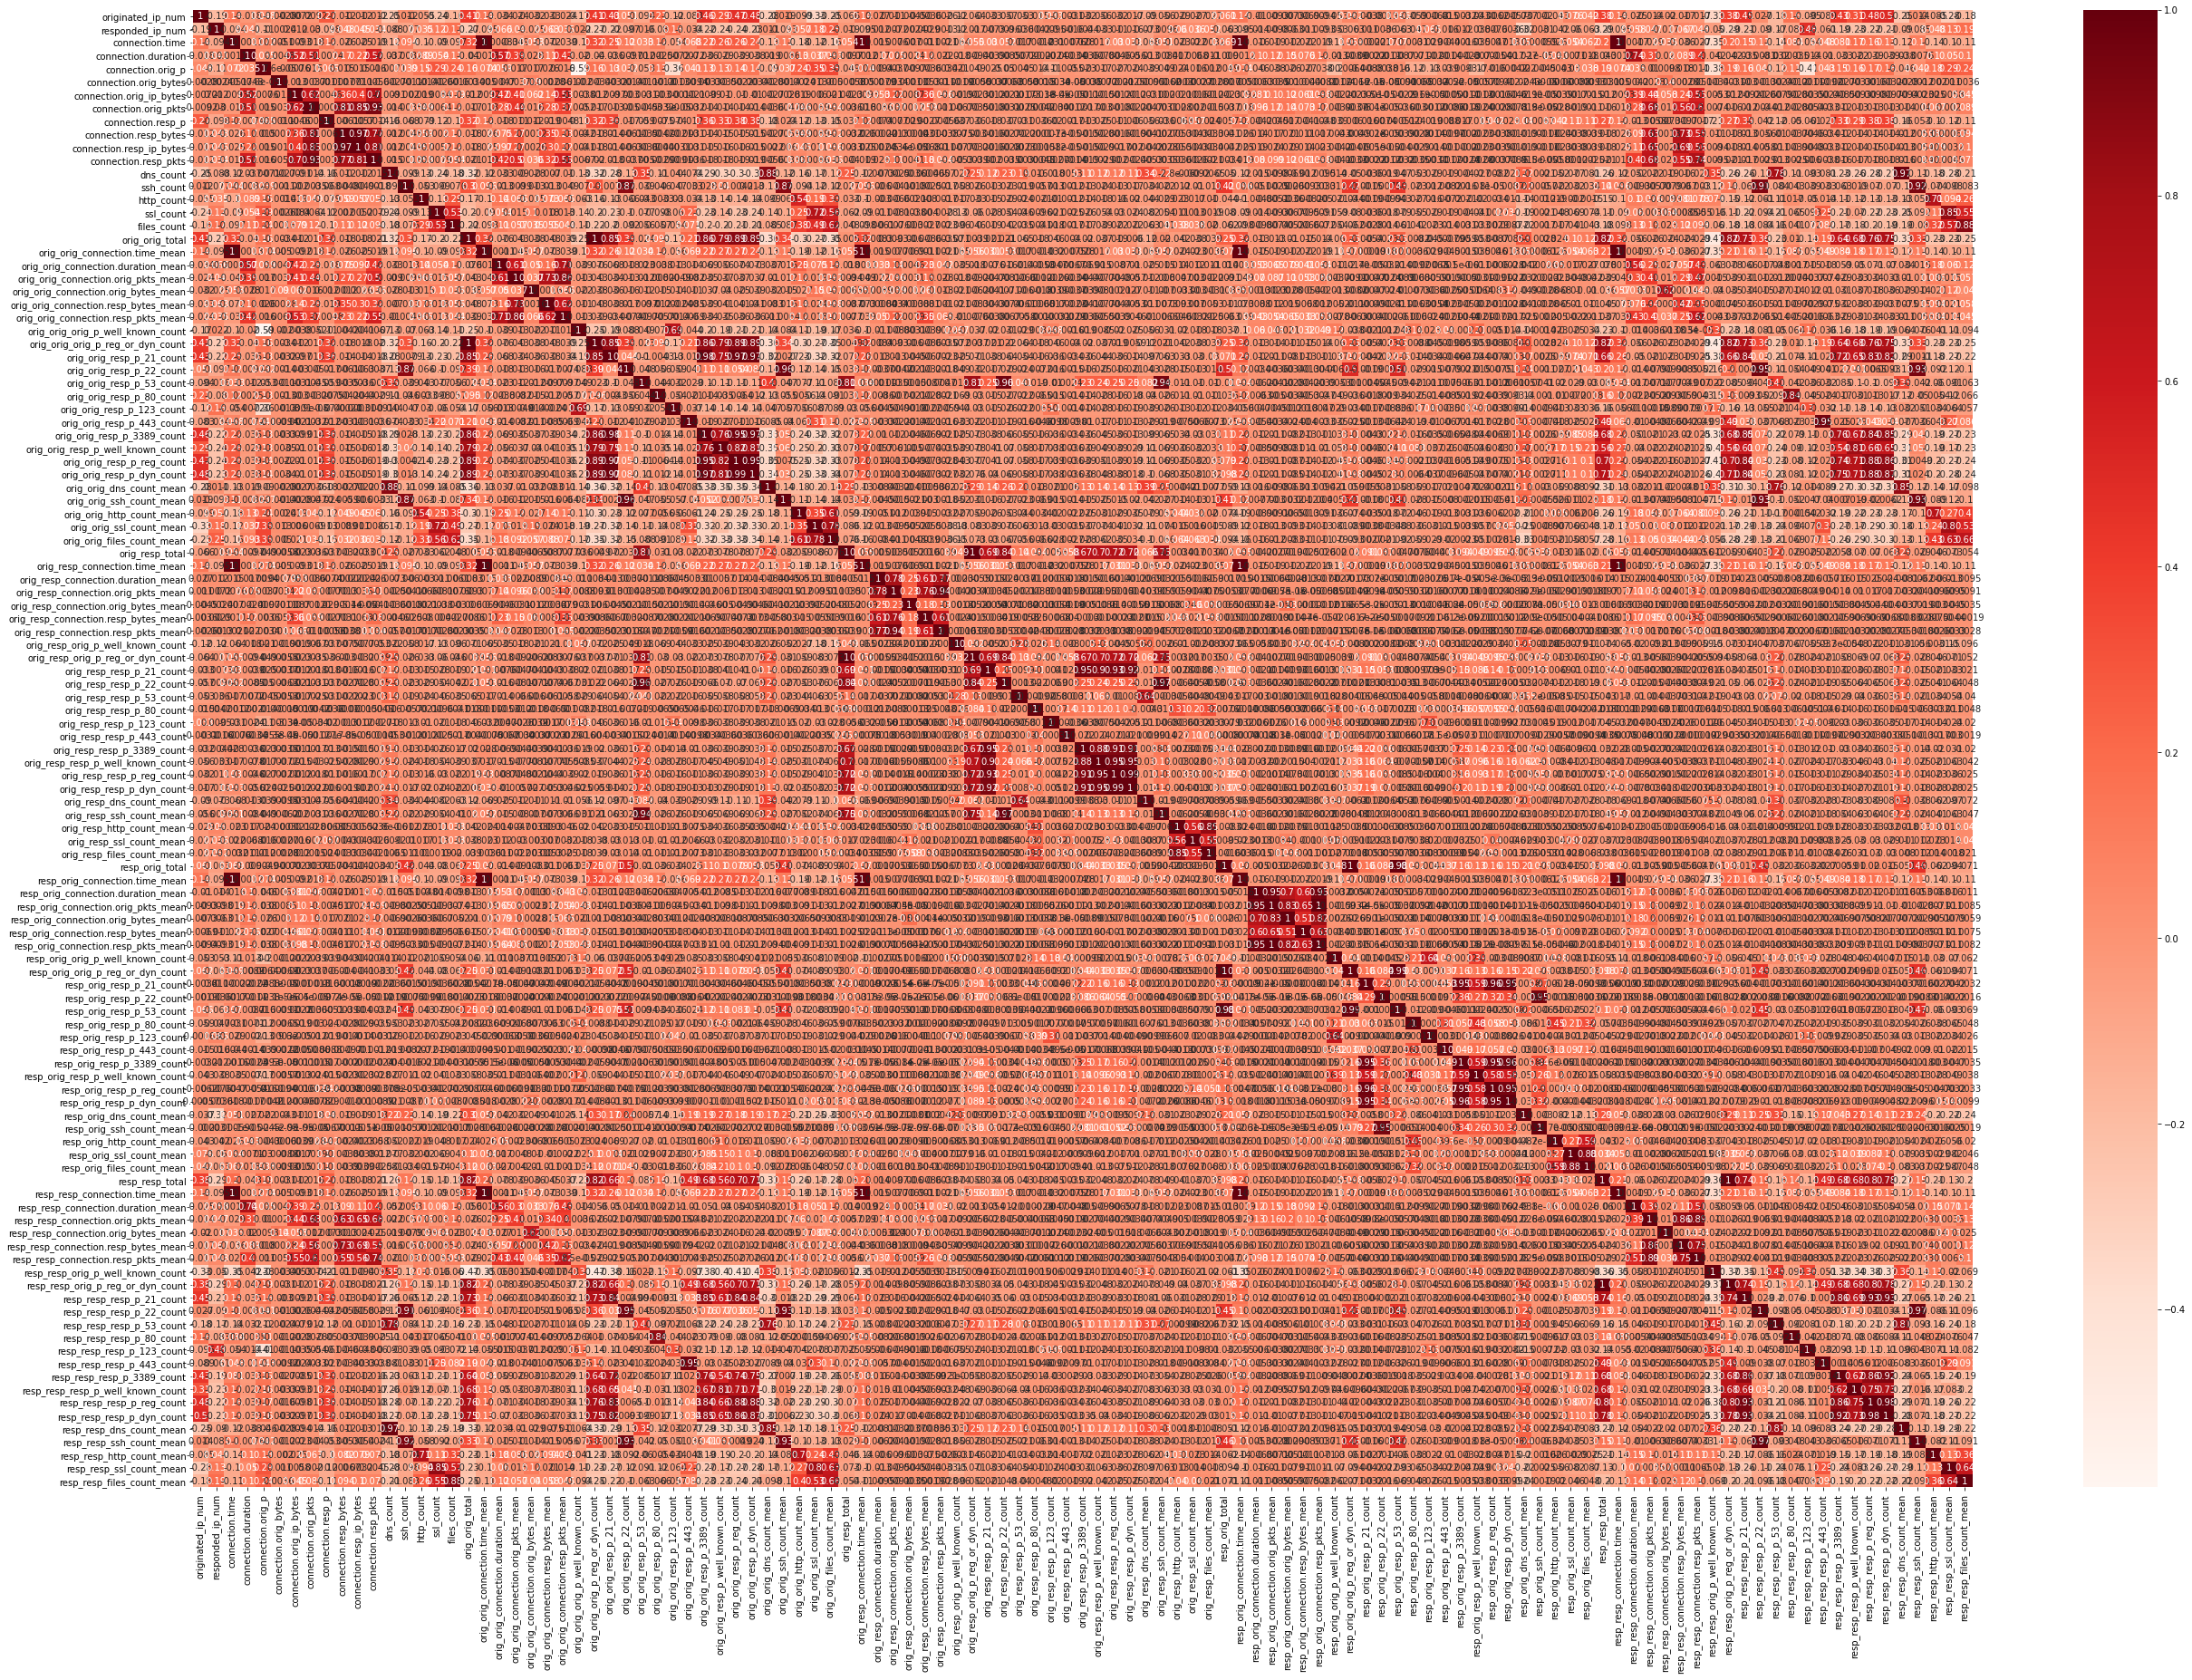

In [63]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(44,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# 6. Write the result to file

In [54]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0                0.045685          0.013622         0.006576   
1                0.045685          0.013622         0.035749   
2                0.045685          0.013622         0.050791   
3                0.045685          0.013622         0.094551   
4                0.045685          0.013622         0.090449   
...                   ...               ...              ...   
472340           0.045667          0.313727         0.810603   
472341           0.045667          0.576390         0.831875   
472342           0.045667          0.762520         0.860461   
472343           0.045667          0.576390         0.927388   
472344           0.045667          0.762520         0.924197   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0              1.960063e-05           0.797143           3.042815e-07   
1              3.901720e-07           0.786737           5.853508e-08   
2              4.695537e-07           0.790765           5.853508e-08   
3              5.491226e-07           0.802332           5.752586e-08   
4              3.368391e-07           0.801080           5.853508e-08   
...                     ...                ...                    ...   
472340         5.908383e-04           0.001877           2.422141e-08   
472341         1.490700e-07           0.001877           2.422141e-08   
472342         1.612337e-07           0.001877           2.422141e-08   
472343         0.000000e+00           0.001877           0.000000e+00   
472344         2.392306e-07           0.001877           2.422141e-08   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.000038              0.000119           0.006775   
1                       0.000008              0.000028           0.001223   
2                       0.000008              0.000028           0.001223   
3                       0.000006              0.000017           0.001223   
4                       0.000008              0.000028           0.001223   
...                          ...                   ...                ...   
472340                  0.000002              0.000006           0.001881   
472341                  0.000002              0.000006           0.001881   
472342                  0.000002              0.000006           0.001881   
472343                  0.000002              0.000006           0.001881   
472344                  0.000002              0.000006           0.001881   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                1.034243e-04              1.376785e-04              0.000197   
1                1.711330e-06              3.395380e-06              0.000059   
2                1.711330e-06              3.187907e-06              0.000049   
3                1.685548e-06              6.543389e-07              0.000029   
4                1.711330e-06              3.187907e-06              0.000049   
...                       ...                       ...                   ...   
472340           3.093931e-07              6.064604e-07              0.000020   
472341           1.546965e-07              3.032302e-07              0.000010   
472342           1.546965e-07              3.032302e-07              0.000010   
472343           0.000000e+00              0.000000e+00              0.000000   
472344           1.546965e-07              3.032302e-07              0.000010   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0             0.0        0.0         0.0        1.0     0.007812   
1             0.0        0.0         1.0        0.0     0.007812   
2             0.0        0.0         1.0        0.0     0.007812   
3             0.0        0.0         1.0        0.0     0.000000   
4             0.0        0.0         1.0        0.0     0.007812   
...           ...        ...         ...        ...     

In [56]:
result_final.to_csv('/home/sramkova/diploma_thesis_data/FINAL_neighbourhood_both_days.csv', index=False, header=True)